In [1]:
#import library for pre-processing

import pandas as pd

In [2]:
#importing the dataset into variable named 'data'

data = pd.read_csv("Customer-Churn-Records.csv")

In [3]:
#checking the first five rows of the dataset

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
#checking the rows and columns
data.shape

(10000, 18)

In [5]:
#checking the column name
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
#checking the data types of all the columns

data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
#checking the unique values of all the columns which can have

print(data['Satisfaction Score'].unique())
print(data['Card Type'].unique())
print(data['Complain'].unique())
print(data['Geography'].unique())
print(data['Gender'].unique())
print(data['NumOfProducts'].unique())
print(data['HasCrCard'].unique())
print(data['IsActiveMember'].unique())

[2 3 5 4 1]
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
[1 0]
['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [8]:
#We can see that there is no null/missing values

data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [9]:
#creating a new data from the previous with only the required columns

new_data = data[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Complain','Satisfaction Score','Card Type','Point Earned','Exited']]

In [10]:
#this will create a dummy data set which will have only numerical values

new_data = pd.get_dummies(new_data,drop_first = True)

In [11]:
new_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Exited,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,0,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,0,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,False,True,False,True,False,False


In [46]:
new_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score',
       'Point Earned', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

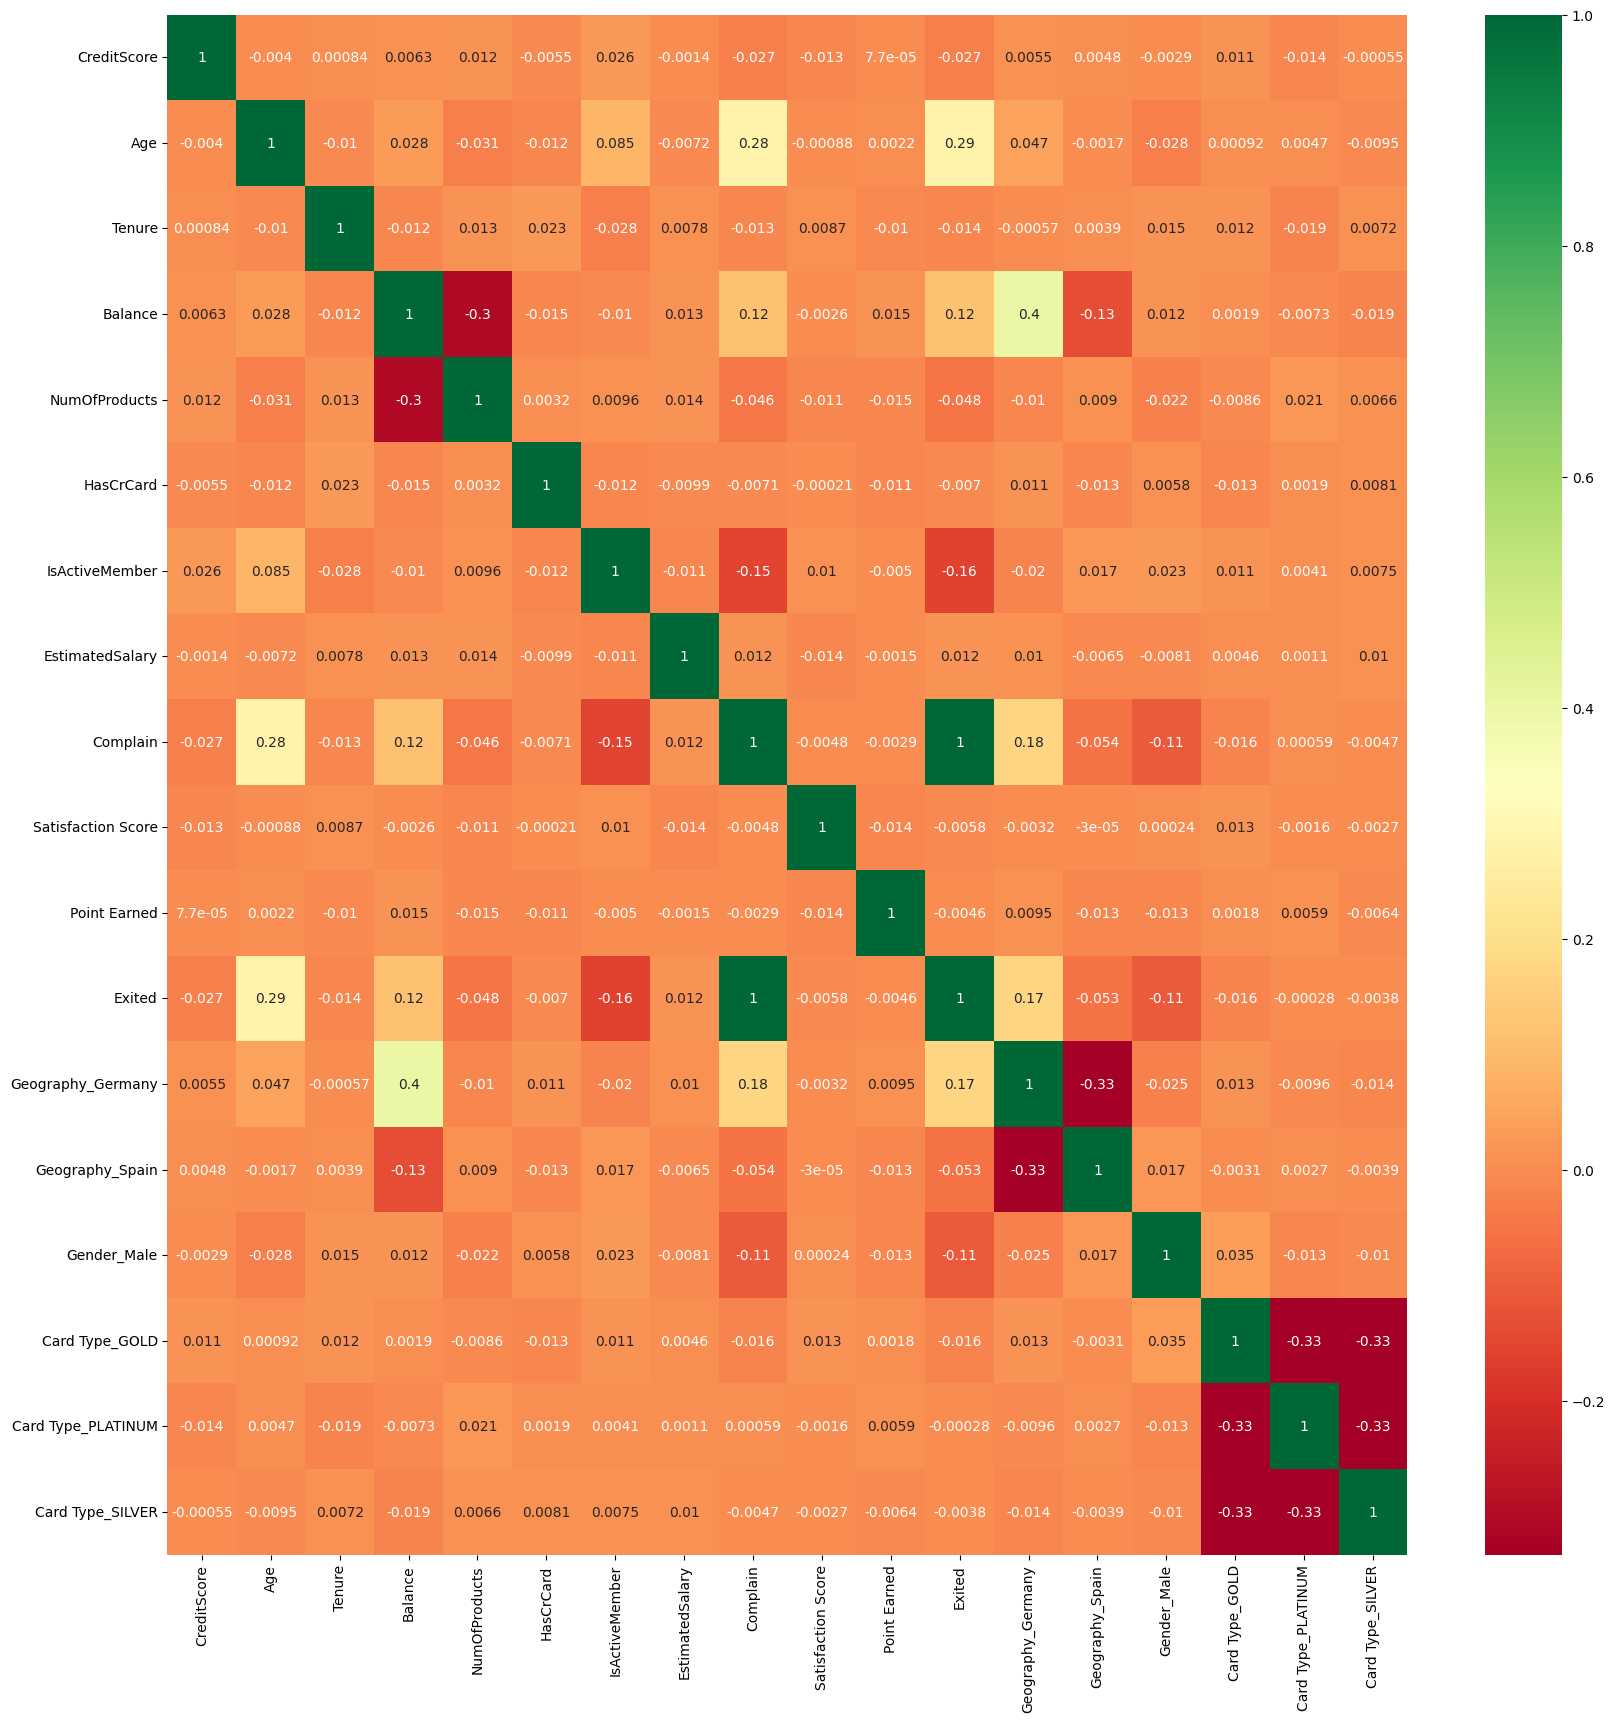

In [13]:
correlation_between_features = new_data.corr() 
top_cor_features = correlation_between_features.index
plt.figure(figsize = (20,20))
sns.heatmap(new_data[top_cor_features].corr(),annot = True,cmap ='RdYlGn')

In [14]:
X = new_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17]]
Y = new_data.iloc[:,[11]].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [17]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57715782,
        -0.58023704, -0.57388614],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57715782,
         1.72343359, -0.57388614],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57715782,
        -0.58023704,  1.74250594],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57715782,
        -0.58023704,  1.74250594],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57715782,
        -0.58023704, -0.57388614],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57715782,
        -0.58023704, -0.57388614]])

In [18]:
Y_train

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train.ravel())

RandomForestClassifier()

In [20]:
Y_pred_rf = rf.predict(X_test)

In [21]:
Y_pred_rf

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
Y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,Y_pred_rf)
print(cm)
as_rf = accuracy_score(Y_test,Y_pred_rf)
print(as_rf)

[[1606    1]
 [   1  392]]
0.999


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg = LogisticRegression()
lg.fit(X_train,Y_train.ravel())

LogisticRegression()

In [26]:
Y_pred_lg = lg.predict(X_test)

In [27]:
cm_lg = confusion_matrix(Y_test,Y_pred_lg)
print(cm_lg)
as_lg = accuracy_score(Y_test,Y_pred_lg)
print(as_lg)

[[1606    1]
 [   1  392]]
0.999


# XG Boost Classifier

In [28]:
import xgboost as XGB
xgb_clss = XGB.XGBClassifier()
xgb_clss.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
Y_pred_xg = xgb_clss.predict(X_test)

In [30]:
cm_xg = confusion_matrix(Y_test,Y_pred_xg)
print(cm_xg)
as_xg = accuracy_score(Y_test,Y_pred_xg)
print(as_xg)

[[1606    1]
 [   1  392]]
0.999


# Analysis

The data set we used was already preprocessed and clean. We found after plotting the heatmap of correlation between the features and Target that 'Complain' is having the very effective relation of '1'. So the model is being explicitrly trained and giving a very high accuracy with all the three models i.e. : Random Forest,Logistic Regression,XGBoost.

So lets drop this column and then check it.

In [31]:
new_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')

In [32]:
new_data.drop(columns = ['Complain'],inplace = True)

In [33]:
X1 = new_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16]]
Y1 = new_data.iloc[:,[10]].values
X1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,5,425,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,300,False,False,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,5,771,False,False,True,False,True,False
9997,709,36,7,0.00,1,0,1,42085.58,3,564,False,False,False,False,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,2,339,True,False,True,True,False,False


In [34]:
X_trainn,X_testt,Y_trainn,Y_testt = train_test_split(X1,Y1,test_size = 0.2,random_state=42)

In [35]:
sc = StandardScaler()
X_trainn = sc.fit_transform(X_trainn)
X_testt =sc.transform(X_testt)

# Random Forest Classifier

In [36]:
rf1 = RandomForestClassifier()
rf1.fit(X_trainn,Y_trainn.ravel())

RandomForestClassifier()

In [37]:
Y_pred_rf1 = rf1.predict(X_testt)

In [38]:
cm1 = confusion_matrix(Y_testt,Y_pred_rf1)
print(cm1)
as_rf1 = accuracy_score(Y_testt,Y_pred_rf1)
print(as_rf1)

[[1553   54]
 [ 206  187]]
0.87


# Logistic Regression

In [39]:
lg1 = LogisticRegression()
lg1.fit(X_trainn,Y_trainn.ravel())

LogisticRegression()

In [40]:
Y_pred_lg1 = lg1.predict(X_testt)

In [41]:
cm_lg1 = confusion_matrix(Y_testt,Y_pred_lg1)
print(cm_lg1)
as_lg1 = accuracy_score(Y_testt,Y_pred_lg1)
print(as_lg1)

[[1542   65]
 [ 313   80]]
0.811


# XG Boost Classifier

In [42]:
xgb_clss1 = XGB.XGBClassifier()
xgb_clss1.fit(X_trainn,Y_trainn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
Y_pred_xg1 = xgb_clss1.predict(X_testt)

In [44]:
cm_xg1 = confusion_matrix(Y_testt,Y_pred_xg1)
print(cm_xg1)
as_xg1 = accuracy_score(Y_testt,Y_pred_xg1)
print(as_xg1)

[[1514   93]
 [ 200  193]]
0.8535


# Analysis

Comparitively we can see that after  performing the analysis out of Random Forest,Logistic Regression, XGBoost 

'Random Forest' is having the highest accuracy of around 86%

In [47]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf1, file)